<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/datasets/insurance.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
data['Страховые выплаты'].unique()

array([0, 1, 2, 3, 5, 4])

In [ ]:
data.duplicated().sum()

153

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


<AxesSubplot:>

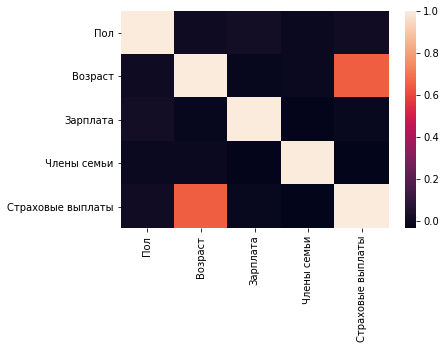

In [ ]:
sns.heatmap(data.corr())

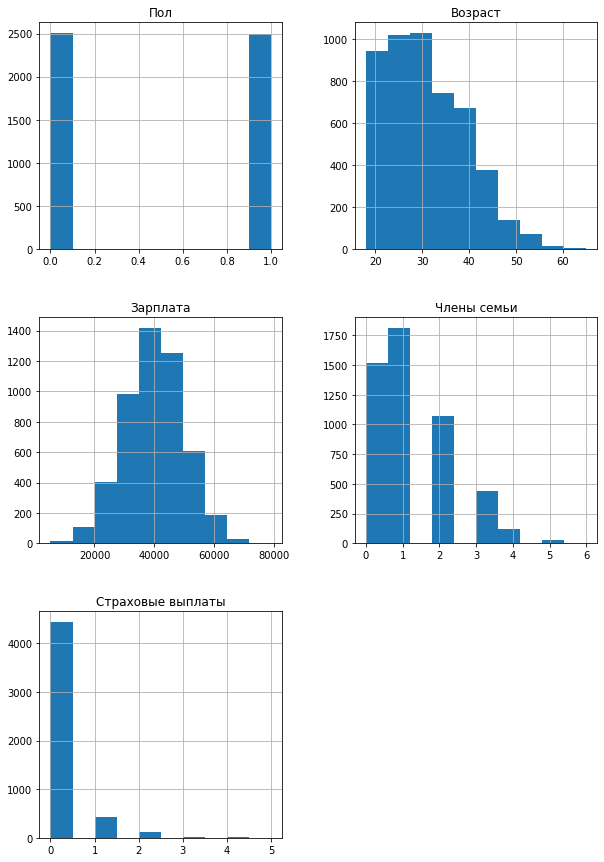

In [ ]:
data.hist(figsize=(10,15))
plt.show()

**Вывод**  
Датасет персональных данных содержит 5 тыс. записей о клиентах страховой компании. Мужчин и женщин равное количество. Список клиен ов представлен в основном лицами от 20 до 40 лет (выборка смещена влево). Распределение заработной платы близко к нормальному распределению. База содержит 153 дублирующих записей. Матрица корреляции показывает, что таргет "Страховые выплаты" сильно коррелирует с возрастом клиента. Признаки независимые друг от друга.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.*

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Умножение признаков на обратимую матрицу не изменит качество линейной регрессии, потому что не изменятся предсказания.

**Обоснование:**
1.Умножим матрицу X случайную обратимую матрицу М и подставим в формулу обучения для нахождения коэффициентов.

$$
X1 = X*P
$$

$$
w1 = ((XP)^T XP)^{-1}*(XP)^T y
$$
2.Преобразуем выражение.
$$
w1 = (X^TP^TXP)^{-1}* (XP)^T y
$$
$$
w1 = (X^TXP^TP)^{-1}* X^TP^T y
$$
$$
w1 = (X^TX)^{-1}(P^T)^{-1}P^{-1}* X^TP^T y
$$
3.Учитывя что
$$
(P^T)^{-1}P^T = Е
$$
единичная матрица, то получаем  
$$
w1 = (X^TX)^{-1}Е*X^TP^{-1} y
$$
4. Переформируем множители
$$
w1 = (P)^{-1}(X^TX)^{-1}X^T y
$$
5. Заменим
$$
w=(X^TX)^{-1}X^T y
$$
$$
w1 = (P)^{-1}w
$$
6. Подставим новое значение в формулу предсказаний
$$
a1 = X1*w1
$$
$$
a1 = XP*(P)^{-1}w1
$$
$$
P(P)^{-1}=E
$$
7. Таким образом получаем, что
$$
a1 = XP(P)^{-1}w = Х*Е*w =Xw = a
$$

**Вывод** Умножение матрицы признаков на обратимую матрицу случайных чисел результаты предсказаний не изменит. А значит данные клиентов страховой компании возможно защитить изменив значения путем умножения на матрицу случайных чисел.
Параметры линейной регрессии в исходной задаче и в преобразованной

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = P^{-1}(X^T X)^{-1}(P^T)^{-1}P^TX^T y
$$
$$
(P^T)^{-1}P^T = P^T(P^T)^{-1} = Е
$$
$$
w' = P^{-1}(X^T X)^{-1}EX^T y
$$
$$
w' = P^{-1}(X^T X)^{-1}X^T y
$$
$$
(X^T X)^{-1}X^T y = w
$$
$$
w' = P^{-1}w
$$
$$
a = Xw
$$
$$
a' = XPw'
$$
$$
a' = XPP^{-1}w
$$
$$
PP^{-1} = Е
$$
$$
a' = XEw = a
$$

## Алгоритм преобразования

In [ ]:
data_features=data.drop('Страховые выплаты',axis=1)
data_target=data['Страховые выплаты']

In [ ]:
matrix=np.array(np.random.randint (10,50,(data_features.shape[1], data_features.shape[1])))

In [ ]:
np.linalg.inv(matrix)

array([[-1.05405167,  0.84040543, -0.22438241,  0.39750313],
       [ 0.49684802, -0.39153467,  0.08671929, -0.16189013],
       [ 0.16157228, -0.1482227 ,  0.06733061, -0.06277481],
       [-0.03061927,  0.05366319, -0.01472692, -0.00121841]])

In [ ]:
np.linalg.det(matrix)

56631.00000000005

In [ ]:
data_features_shifr = data_features @ matrix

In [ ]:
data_features_recovery = data_features_shifr  @ inv(matrix)

In [ ]:
for i in data_features_recovery.iloc[:, [0, 3]]:
    data_features_recovery[i] = data_features_recovery[i].astype(int)
data_features_recovery.columns = data_features.columns

**Обоснование**
Коэффициенты W1 новой преобразованной матрицы связаны в коэффициентами первоначальной W через множитель, который срответствует обратной матрице случайных чисел.
$$
w1 = (P)^{-1}w
$$

Подставив данное значение в формулу предсказаний получим
$$
a1 = XP(P)^{-1}w = Х*Е*w =Xw = a
$$

**Предсказания, полученные из первоначальной матрицы признаков, полностью совпадают с предсказаниями, полученными из  преобразованной матрицы признаков.**

## Проверка алгоритма

In [ ]:
model = LinearRegression()
model.fit(data_features, data_target)
predictions = model.predict(data_features)
r2_score1 = r2_score(data_target, predictions)
print(r2_score1)

0.4249455028666801


In [ ]:
model = LinearRegression()
model.fit(data_features_shifr, data_target)
predictions = model.predict(data_features_shifr)
r2_score2 = r2_score(data_target, predictions)
print(r2_score2)

0.42494550286672517


In [ ]:
print(r2_score1-r2_score2)

-4.5075054799781356e-14


**Вывод**.
R2-score почти не отличается. Умножение признаков на обратимую матрицу не влияет на результат предсказаний. Этот факт обьяснется тем, что новые значения признаков учитываются при обучении с новыми весами согласно новому коэффициенту.